In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rv_continuous
from scipy import integrate

class CustomDistrib(rv_continuous):
    def __init__(self, a , b):
        super().__init__(a=a, b=b, name='custom_dist')
    
    def _pdf(self, x):
        """Плотность распределения"""
        result = np.zeros_like(x)
        result[(x >= self.a) & (x <= self.b)] = 2 * (x - a) / (b - a)**2
        return result
    
    def _cdf(self, x):
        "Функция распределения"
        result = np.zeros_like(x)
        result[x < self.a] = 0
        result[(x >= self.a) & (x <= self.b)] = (x - a)**2 / (b - a)**2
        result[x > self.b] = 1
        return result
    # def _ppf(self, q):
    #     return (15 * q + 1)** 0.25

a, b = 1.0, 3.0
custom_dist = CustomDistrib(a, b) 

sample = custom_dist.rvs(size=10000) # генерация выборки

print(f"Размер выборки: {len(sample)}")
print(f"Первые 10 значений: {sample[:10]}")
x_test = np.linspace(a - 0.5, b + 0.5, 100)
pdf_values = custom_dist.pdf(x_test)
cdf_values = custom_dist.cdf(x_test)
print("\nПроверка нормировки плотности: ")
integral, error = integrate.quad(custom_dist.pdf, a, b)
print(f"f(x)dx на [{a}, {b}] = {integral:.6f} (ошибка: {error:.2e})")
print("\nПроверка в граничных точках:")
print(f"F({a}) = {custom_dist.cdf(a):.6f}")
print(f"F({b}) = {custom_dist.cdf(b):.6f}\n")
# Вычисление числовых характеристик
print("ЧИСЛОВЫЕ ХАРАКТЕРИСТИКИ".center(50, '*'))
mean, var, sk, kurt = custom_dist.stats(moments='mvsk')
print(f"M(X) = {mean:.4f}")
print(f"D(X) = {var:.4f}")
print(f"A(X) = {sk:.4f}")
print(f"E(X) = {kurt:.4f}")
print(f"Медиана: {custom_dist.median():.4f}")
# Квантиль
print(f"40%-квантиль: {custom_dist.ppf(0.4):.4f}")
# p% - точка
print(f"20%-точка: {custom_dist.ppf(1 - 0.2):.4f}\n")

#Вероятность попадания в заданный интервал
print("Вероятность попадания в интервал".center(50, '*'))
print(f"P(2<= x <= 3) = {custom_dist.cdf(3) - custom_dist.cdf(2)}")

Размер выборки: 10000
Первые 10 значений: [2.82648342 2.97861664 1.98581047 1.53081564 2.09463125 2.60688146
 2.79889036 1.76844936 1.86217715 1.92055746]

Проверка нормировки плотности: 
f(x)dx на [1.0, 3.0] = 1.000000 (ошибка: 1.11e-14)

Проверка в граничных точках:
F(1.0) = 0.000000
F(3.0) = 1.000000

*************ЧИСЛОВЫЕ ХАРАКТЕРИСТИКИ**************
M(X) = 2.3333
D(X) = 0.2222
A(X) = -0.5657
E(X) = -0.6000
Медиана: 2.4142
40%-квантиль: 2.2649
20%-точка: 2.7889

*********Вероятность попадания в интервал*********
P(2<= x <= 3) = 0.75


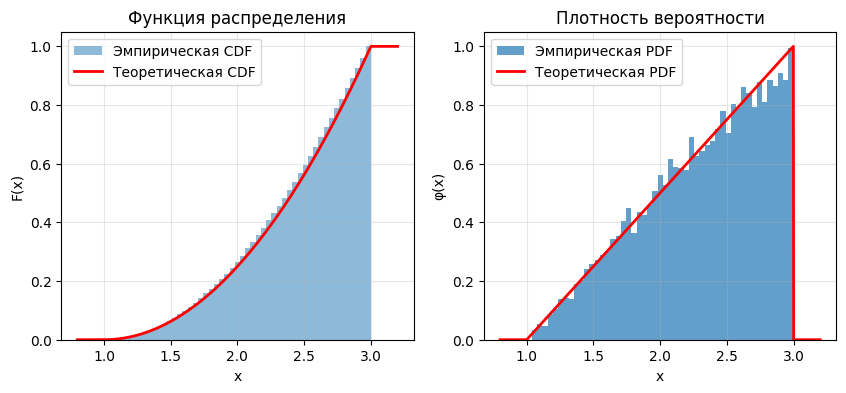

In [16]:
#Графики

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

x_plot = np.linspace(a - 0.2, b + 0.2, 1000)

ax1.hist(sample, bins=50, density=True, cumulative=True, alpha=0.5, label="Эмпирическая CDF" )
ax1.plot(x_plot, custom_dist.cdf(x_plot), "r-", linewidth=2, label="Теоретическая CDF")
ax1.set_xlabel("x")
ax1.set_ylabel("F(x)")
ax1.set_title("Функция распределения")
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.hist(sample, bins=50, density=True, alpha=0.7, label="Эмпирическая PDF")

ax2.plot(x_plot, custom_dist.pdf(x_plot), "r-", linewidth=2, label="Теоретическая PDF")

ax2.set_xlabel("x")
ax2.set_ylabel("φ(x)")
ax2.set_title("Плотность вероятности")
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.show()